# Dependencies and Setup

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : sorong
Processing Record 2 of Set 1 : yumen
Processing Record 3 of Set 1 : mataura
Processing Record 4 of Set 1 : port elizabeth
Processing Record 5 of Set 1 : norman wells
Processing Record 6 of Set 1 : bosaso
Processing Record 7 of Set 1 : xining
Processing Record 8 of Set 1 : bredasdorp
Processing Record 9 of Set 1 : bluff
Processing Record 10 of Set 1 : punta arenas
Processing Record 11 of Set 1 : hermanus
Processing Record 12 of Set 1 : terrace
Processing Record 13 of Set 1 : campo verde
Processing Record 14 of Set 1 : muroto
Processing Record 15 of Set 1 : dalbandin
Processing Record 16 of Set 1 : kruisfontein
Processing Record 17 of Set 1 : upata
Processing Record 18 of Set 1 : lebu
Processing Record 19 of Set 1 : yellowknife
Processing Record 20 of Set 1 : thompson
Processing Record 21 of Set 1 : chokurdakh
Processing Record 22 of Set 1 : hobyo
Processing Record 23 of Set 1 : jamestown
City n

Processing Record 35 of Set 4 : mezen
Processing Record 36 of Set 4 : tahoua
Processing Record 37 of Set 4 : broken hill
Processing Record 38 of Set 4 : phibun mangsahan
Processing Record 39 of Set 4 : aklavik
Processing Record 40 of Set 4 : kununurra
Processing Record 41 of Set 4 : bobon
Processing Record 42 of Set 4 : los llanos de aridane
Processing Record 43 of Set 4 : bethel
Processing Record 44 of Set 4 : anadyr
Processing Record 45 of Set 4 : banska bystrica
Processing Record 46 of Set 4 : seoni
Processing Record 47 of Set 4 : georgetown
Processing Record 48 of Set 4 : rudnichnyy
Processing Record 49 of Set 4 : kahului
Processing Record 50 of Set 4 : baruun-urt
Processing Record 0 of Set 5 : salekhard
Processing Record 1 of Set 5 : yulara
Processing Record 2 of Set 5 : constitucion
Processing Record 3 of Set 5 : deputatskiy
Processing Record 4 of Set 5 : fukue
Processing Record 5 of Set 5 : severodvinsk
Processing Record 6 of Set 5 : boden
Processing Record 7 of Set 5 : rafai
Ci

Processing Record 24 of Set 8 : podosinovets
Processing Record 25 of Set 8 : andenes
Processing Record 26 of Set 8 : raga
Processing Record 27 of Set 8 : tuscaloosa
Processing Record 28 of Set 8 : huron
Processing Record 29 of Set 8 : pisco
City not found. Skipping...
Processing Record 30 of Set 8 : ayagoz
Processing Record 31 of Set 8 : iguatemi
Processing Record 32 of Set 8 : puerto ayacucho
Processing Record 33 of Set 8 : ajdabiya
Processing Record 34 of Set 8 : solnechnyy
Processing Record 35 of Set 8 : jimo
Processing Record 36 of Set 8 : bushehr
Processing Record 37 of Set 8 : bay roberts
Processing Record 38 of Set 8 : bairiki
Processing Record 39 of Set 8 : zaysan
Processing Record 40 of Set 8 : reni
Processing Record 41 of Set 8 : balta
Processing Record 42 of Set 8 : nichinan
Processing Record 43 of Set 8 : egvekinot
Processing Record 44 of Set 8 : puerres
Processing Record 45 of Set 8 : sampit
Processing Record 46 of Set 8 : nizhniy kuranakh
Processing Record 47 of Set 8 : l

# Convert Raw Data to DataFrame

In [6]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [7]:
# Count data
weather_dict.count()

City          566
Cloudiness    566
Country       566
Date          566
Humidity      566
Lat           566
Lng           566
Max Temp      566
Wind Speed    566
dtype: int64

In [8]:
# Display the Data Frame
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sorong,100,ID,1627433313,71,-0.8833,131.2500,84.22,7.54
1,Yumen,0,CN,1627433243,18,40.2833,97.2000,79.30,5.21
2,Mataura,69,NZ,1627433112,74,-46.1927,168.8643,51.48,0.63
3,Port Elizabeth,0,ZA,1627433107,88,-33.9180,25.5701,57.49,16.11
4,Norman Wells,75,CA,1627433059,43,65.2820,-126.8329,71.64,8.05
...,...,...,...,...,...,...,...,...,...
561,Opuwo,0,NA,1627433664,34,-18.0607,13.8400,55.02,6.73
562,Virginia Beach,40,US,1627433333,86,36.8529,-75.9780,86.02,3.44
563,Palizada,24,MX,1627433665,74,18.2500,-92.0833,81.01,5.93
564,Licheng,70,CN,1627433534,71,23.2955,113.8284,87.73,3.51


# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

# Latitude vs Temperature Plot

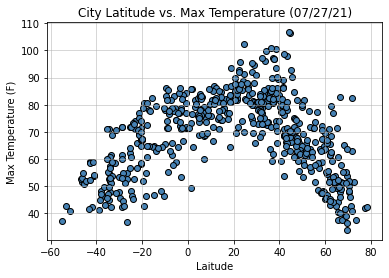

In [27]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (07/27/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

# Latitude vs. Humidity Plot

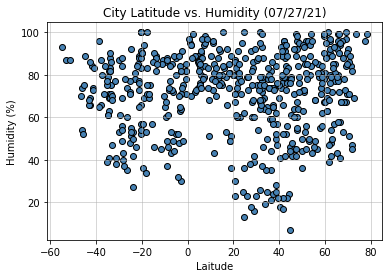

In [26]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (07/27/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

# Latitude vs. Wind Speed Plot

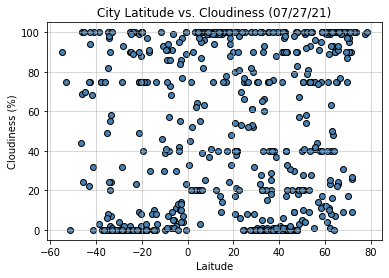

In [28]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (07/27/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

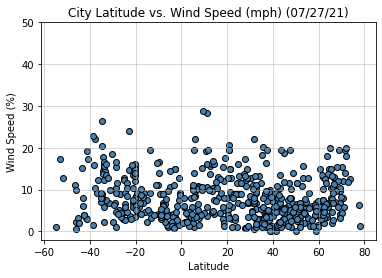

In [31]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (07/27/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

# Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [16]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.64


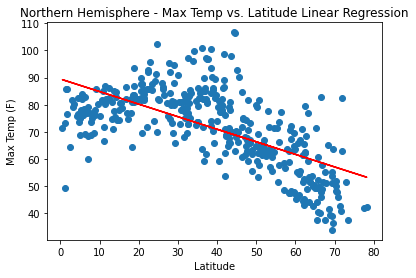

In [17]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression¶

The r-squared is : 0.69


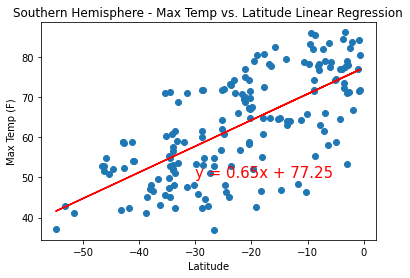

In [18]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.04


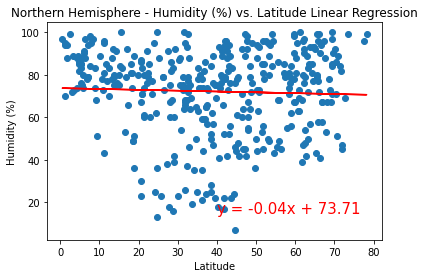

In [20]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.05


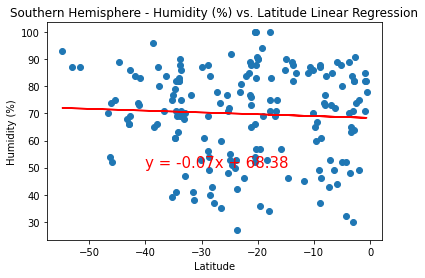

In [30]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.01


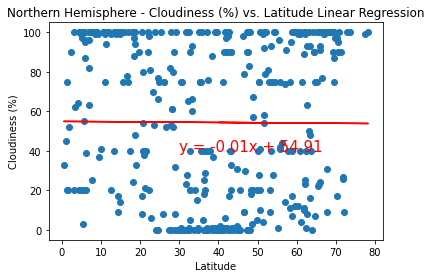

In [22]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.06


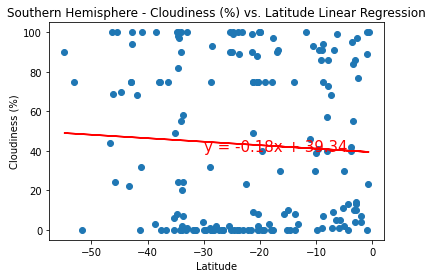

In [23]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.06


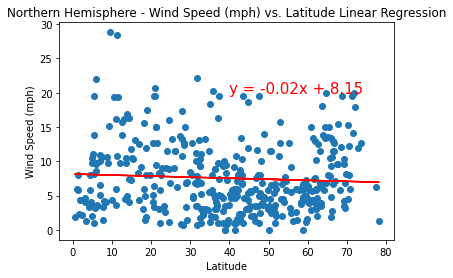

In [24]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.27


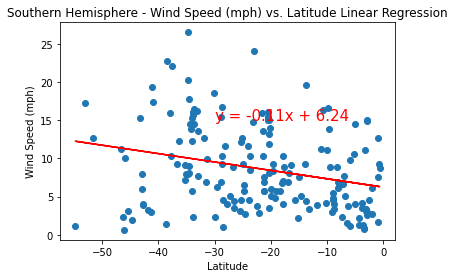

In [25]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")